# EDA  (Exploratory Data Analysis)
**univariate analysis**

**bivariate analysis**

           **num vs num
           **cat vs num - Boxplot
           **cat vs cat

**Missing values**

**Outlier analysis and removal-Boxplot & Normal Distribution.**

**Feature Engineering.**

**Statistical Analysis to verify the relation between Predictor & Target**

**Data Transformation, Scaling & Encoding ~ Data Preprocessing Stage**

**Model Building**

In [1]:
## Here we will focus on all the major parameters in Exploratory Data Analysis as mentioned above, 
## and will explain each topic while working with a dataset, draw insights and make inferences from the data. 

In [7]:
## Importing the important libraries in python in order to work effortlessly in python.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
## Importing the data set directly from the url.


sales=pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [14]:
## Using the head function to inspect the top 5 rows of the dataset,
## Gives us an upperhand in learning more/comprehending about the Data 
##and later working on it in the best possible way.

sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
sales.shape 

## To get an idea about the total no. of rows and columns in the provided data set


(8523, 12)

In [18]:
sales.describe()


## To have a basic understanding of the range of numerical columns in the data
## and how they are spread out from a descriptive perspective.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [20]:
nums=sales.select_dtypes(include=np.number).columns

# to find the numerical variables in a dataset and undergo the
## process of univariate analysis, we must store the numeical columns of the
## Data in a variable and then begin the process of univariate analysis.

nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

# UNIVARIATE Analysis:

In [21]:
len(nums)

5

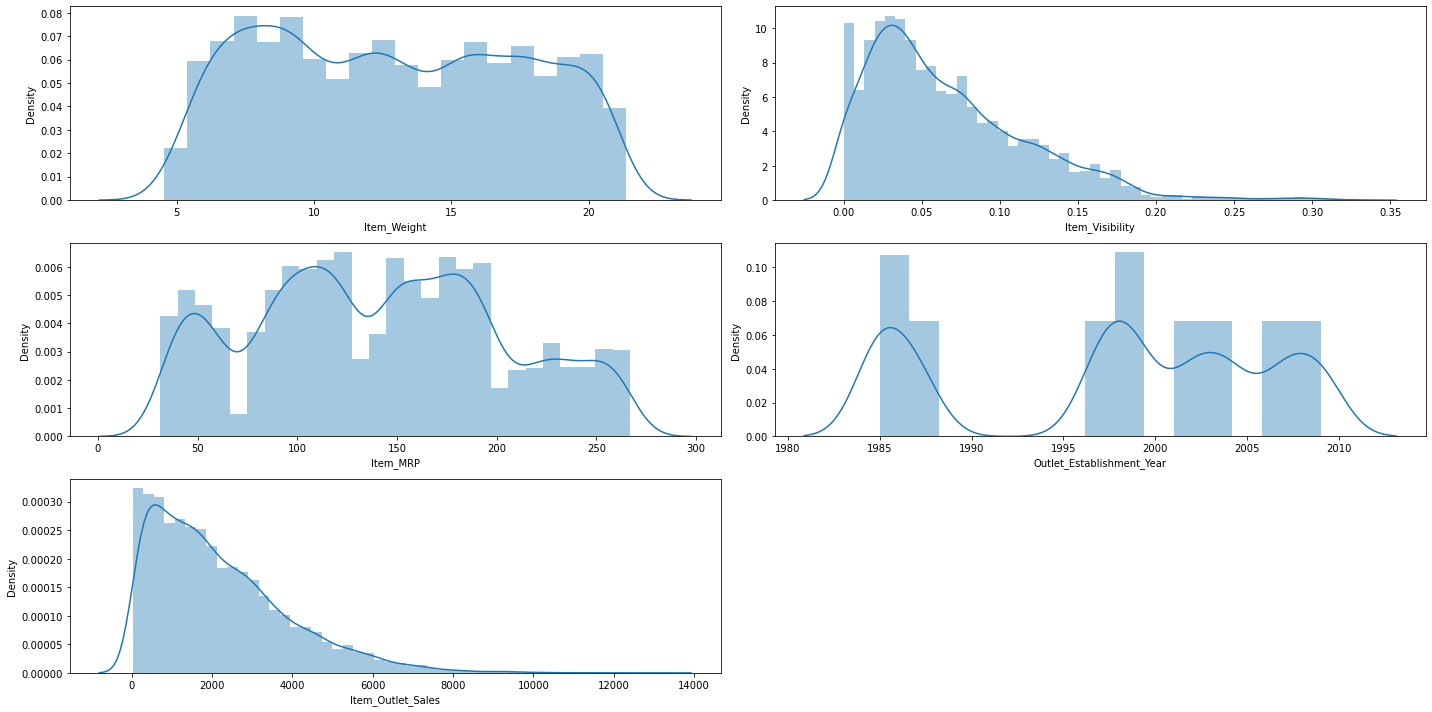

In [23]:
# for warnings
import warnings
warnings.filterwarnings('ignore')
#Plot dimension
plt.rcParams['figure.figsize']=[20,10]

n_rows=3
n_cols=2
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter) # Creating the space for 6 plots so the plots can be shown 
    sns.distplot(sales.loc[:,i].dropna()) # command for creating distplot using loop, i is iterating through the columns
                                          #.dropna()is used to drop the missing values in the columns
    counter+=1
plt.tight_layout()
plt.show()


##Plotted the graph using loops for all the numerical columns in the dataset
##Now we would be furher plotting the distplot of these individual columns 
## And try to draw meaningful insights from the same,

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

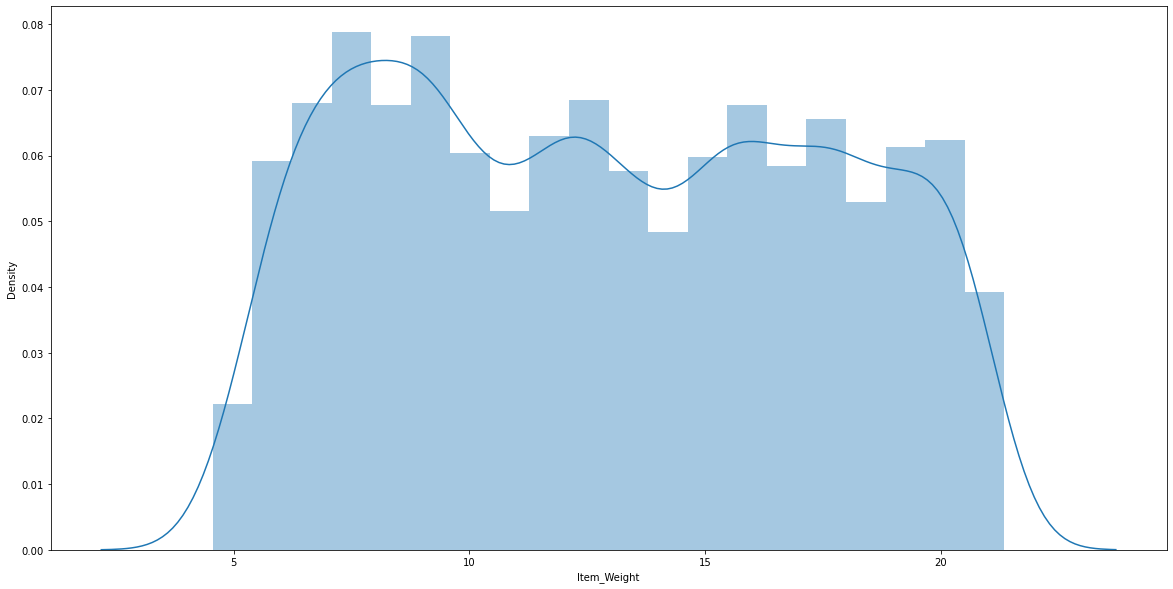

In [33]:
sns.distplot(sales.loc[:,'Item_Weight'])


## Inference. 

## Item Weight is kind of uniform in nature, as not much changes were observed in 
## The given plot.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

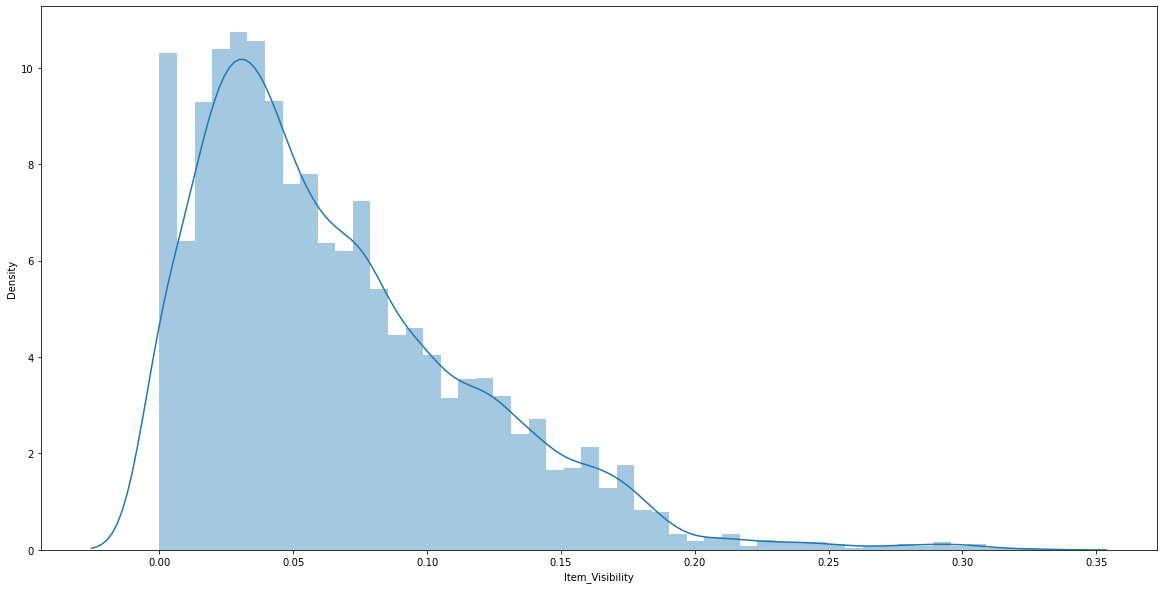

In [25]:
sns.distplot(sales.loc[:,'Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

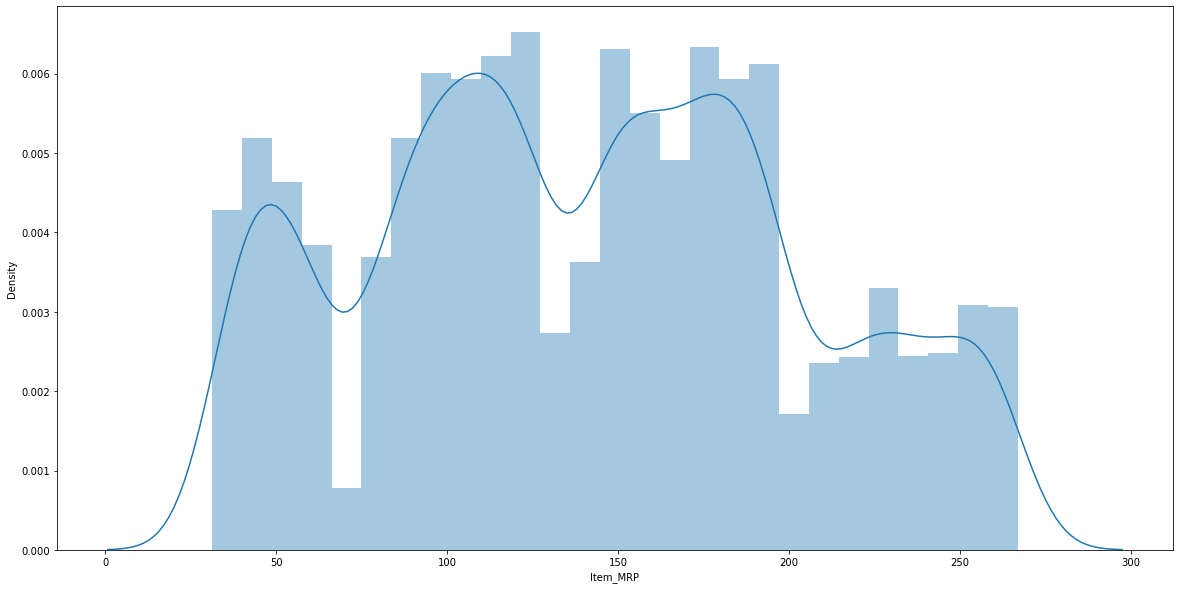

In [30]:
sns.distplot(sales.loc[:,'Item_MRP'])


# Inference
# This is a mutimodal data Because there are multiple modes of the product MRP


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

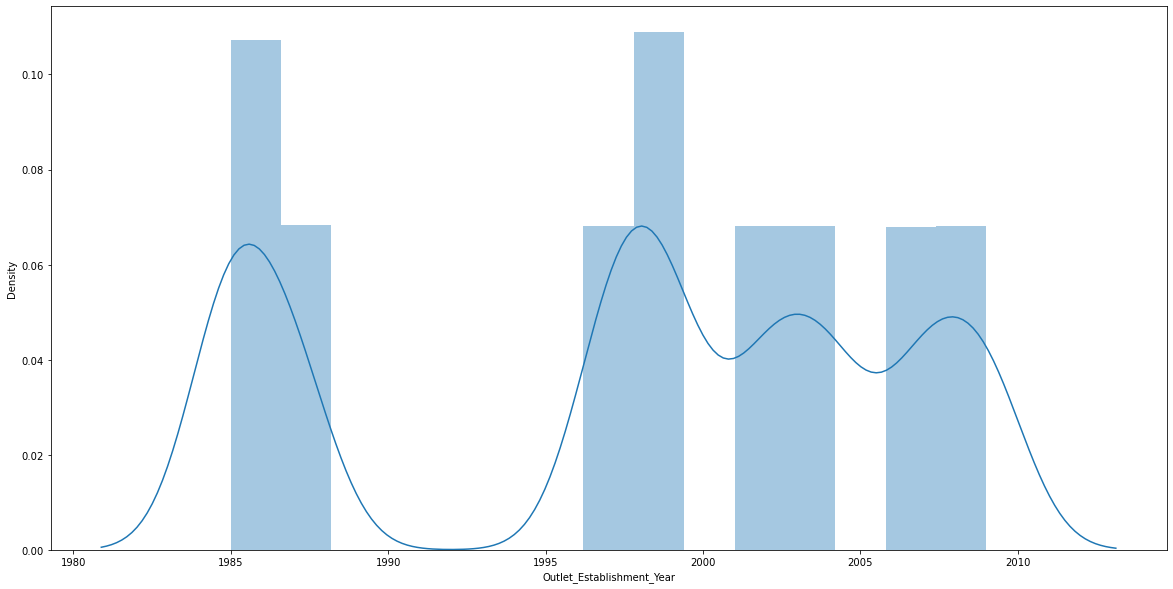

In [32]:
sns.distplot(sales.loc[:,'Outlet_Establishment_Year'])


##Inference

## No such meaningfull insights drawn from the outlet estblishment year column

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

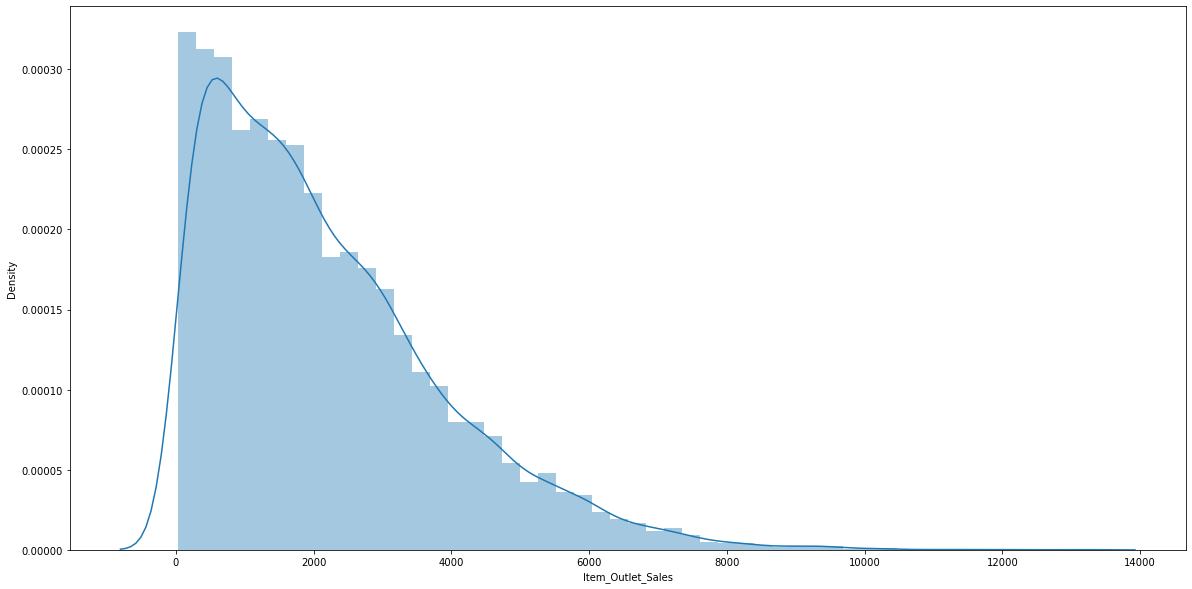

In [34]:
sns.distplot(sales.loc[:,'Item_Outlet_Sales'])


#Inference
#Item outlet sales is positively skewed in nature


In [36]:
# Plotting the categorical column

In [39]:
## Checking for all the categorical variables in the data,
## trying to draw meaningful insights from each of the columns 

cat=sales.select_dtypes(include=np.object_).columns
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

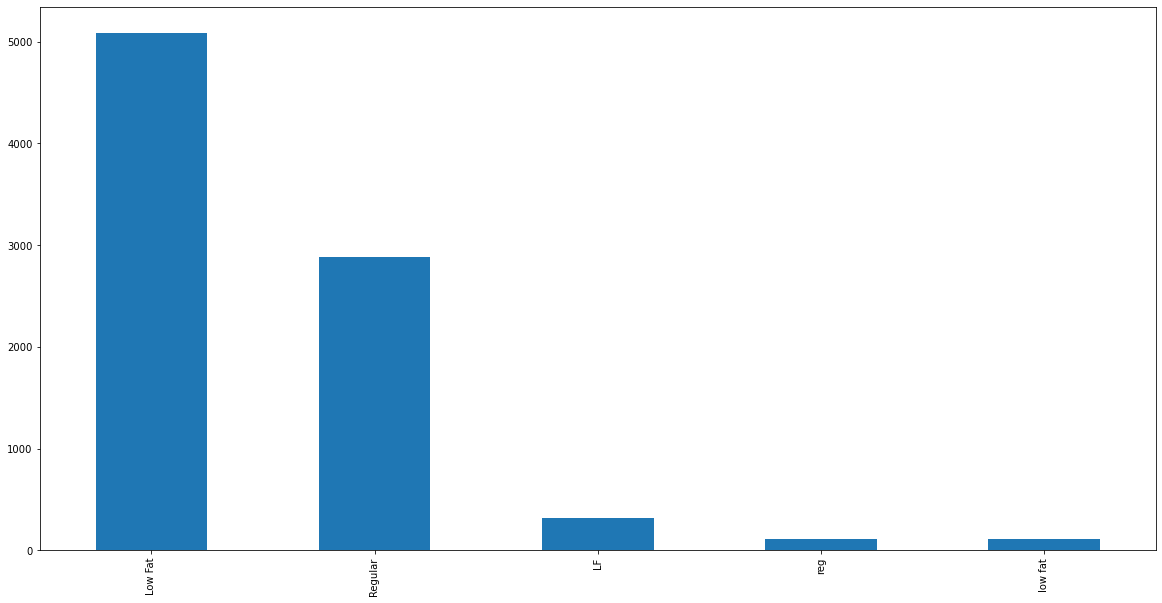

In [44]:
## Checking for "Item_Fat_Content"

sales.Item_Fat_Content.value_counts().plot(kind="bar")
plt.show()


##Here we can make out that basically there are only 2 types of fat categories
## But the data seems to have multiple categories, representing the same thing.
## So we will replace these irragularities, by replacing them,
## And bringing them in the same category and draw a better meaningful insight.


## Thus replacing the LF and REg in their respective categories.

In [47]:
sales.Item_Fat_Content.replace(to_replace=['LF','low fat','reg'],value=['Low Fat','Low Fat','Regular'],inplace=True)

<AxesSubplot:>

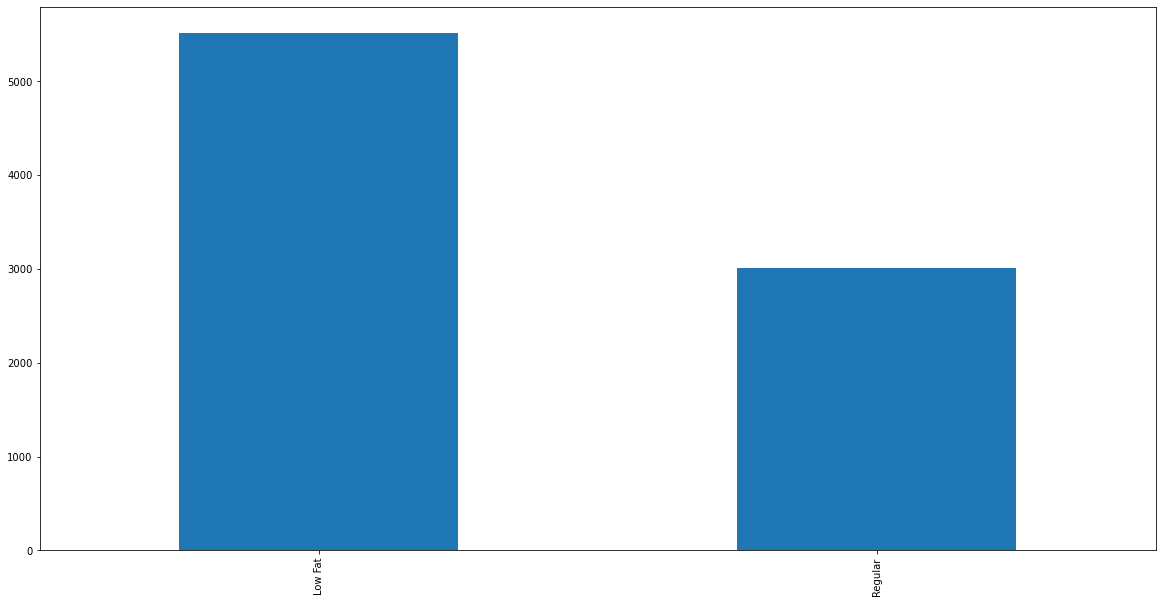

In [52]:
sales.Item_Fat_Content.value_counts().plot(kind='bar')
                                           
                    
##Inference.
## THe data here tends to contain more items of low fat as compared to regular 


<AxesSubplot:>

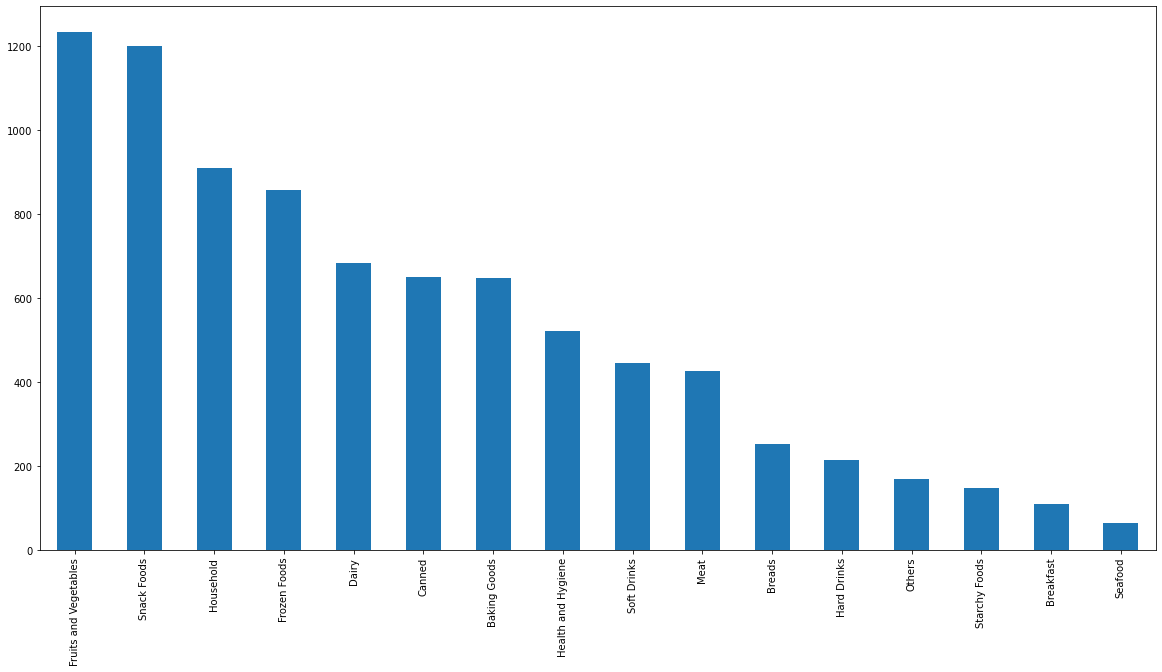

In [55]:
# Item Type 

sales.Item_Type.value_counts().plot(kind='bar')

## With this we can say that the top 5 selling products are 

#'Fruits and Vegetables' 
#'Snack Foods'
#'Household' 
#'Frozen Foods',
#'Dairy'.

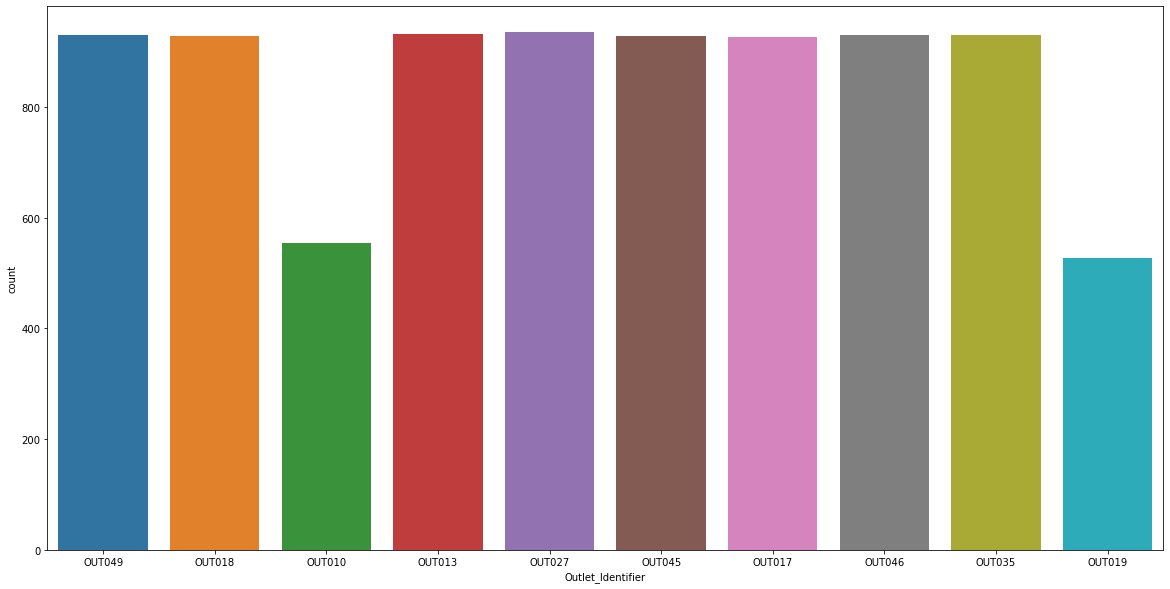

In [57]:
# For Outlet_id
sns.countplot(sales.Outlet_Identifier)
plt.show()

In [59]:
## Inference

##  the outlet 10 and outlet 19 has the lowest sales as compare to the other outlets


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

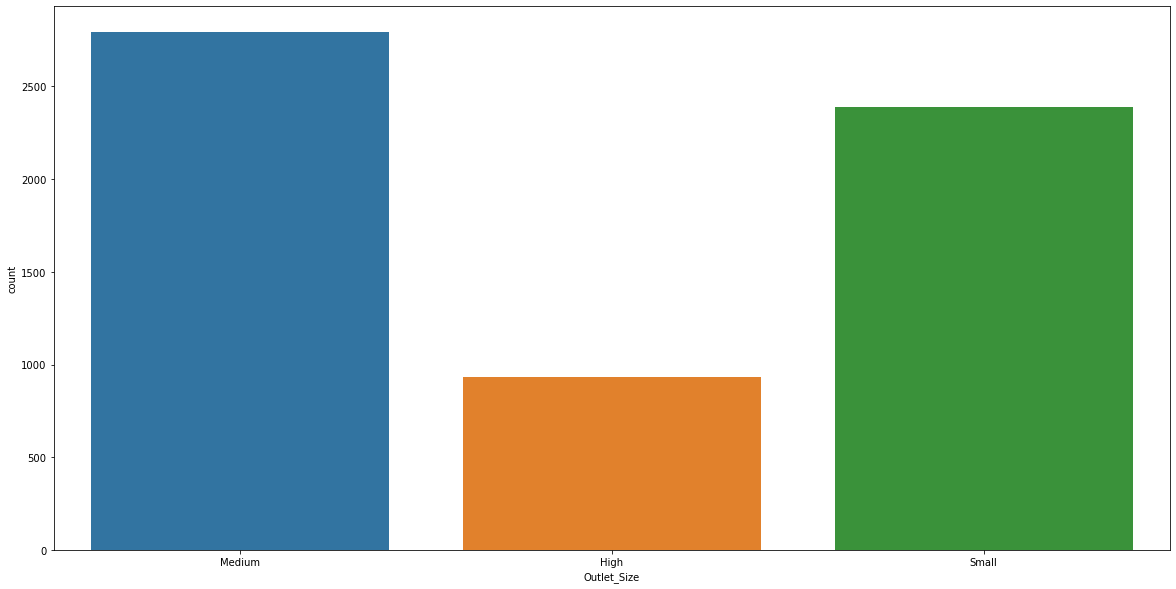

In [62]:
##CHecking for outlet size

sns.countplot(sales.Outlet_Size)

## Inference
## Medium and small sized outlets are performing better 


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

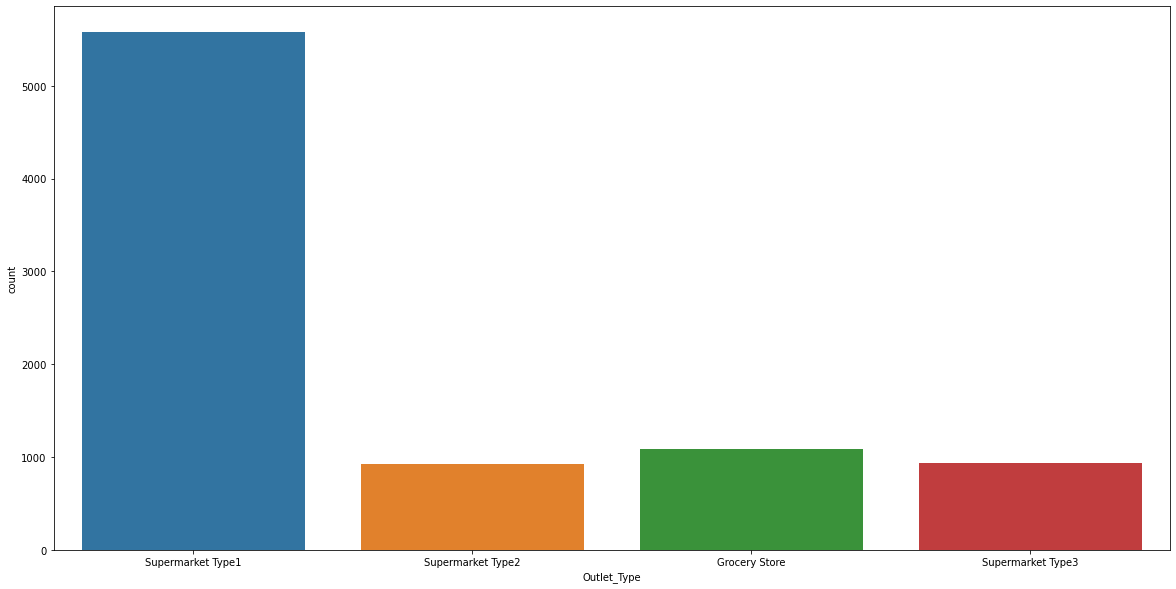

In [66]:
# Outlet_Type


sns.countplot(sales.Outlet_Type)


## Inference 
## With this we can say that the supermarket Type 1 outlet types 
## Are performing extremly well.

**SUMMARY of UNIVARIATE ANALYSIS**


 **Out 27 is the maximum revenue genrator for the buisness
 
 **We relaize this stores is the mostly opened in Tier 3 cities and the type of the outlet is medium size outlet
 
 **The items that are sold in the outlet are fruits and veggies,snacks,frozen, household followed by diary
 
 **Most of the items are genrally low fat and regular types 
 
 **The lowest performing outelets are out10 and out19 
 
 **super market type 1 appear the most commonly seen outlet across the the locations 


# The End.